# Homework 3 (ADM) - Michelin restaurants in Italy

Author: Viktoriia Vlasenko  

Email: [vlasenko.2088928@studenti.uniroma1.it](mailto:vlasenko.2088928@studenti.uniroma1.it)

***

## 1. Data collection

For this homework, to improve readability in reporting and efficiency in deploying the code I created ```crawler.py```, ```parser.py```, and ```engine.py``` modules.

**Import custom modules from github**

In [161]:
import importlib.util
import os

# Step 1: Re-clone the Repository
# Delete the existing directory (if it exists) and re-clone the repository
!rm -rf /kaggle/working/ADM-HW3
!git clone https://github.com/vikavl/ADM-HW3.git /kaggle/working/ADM-HW3

# Step 2: Define the paths to the modules
crawler_path = '/kaggle/working/ADM-HW3/crawler.py'
parser_path = '/kaggle/working/ADM-HW3/parser.py'
engine_path = '/kaggle/working/ADM-HW3/engine.py'

# Step 3: Define a function to load or reload a module from a given path
def load_module_from_path(module_name, path):
    spec = importlib.util.spec_from_file_location(module_name, path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Step 4: Load or Reload the Modules
# This loads the latest versions of crawler and parser
crawler = load_module_from_path("crawler", crawler_path)
parser = load_module_from_path("parser", parser_path)
engine = load_module_from_path("engine", engine_path)

# Download NLTK packages
engine.setup()

Cloning into '/kaggle/working/ADM-HW3'...
remote: Enumerating objects: 2248, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 2248 (delta 95), reused 157 (delta 95), pack-reused 2090 (from 1)
Receiving objects: 100% (2248/2248), 11.95 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (2068/2068), done.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
WordNet fix applied successful

### 1.1. Get the list of Michelin restaurants

`scrapling()` is a function which web scraples  Michelin's restaurant pages, retrieving restaurant URLs.



The function creates `restaurants.txt` file for  storing the results with URLs.




In [29]:
help(crawler.scraping)

Help on function scraping:

scraping(filename='restaurants.txt', n_pages=100)
    Crawls restaurant links from Michelin's website and saves them to a text file.
    Args:
        filename (str): Name of the file to save the restaurant URLs.
        n_pages (int): Number of pages to scrape.
    This function scrapes restaurant listing pages and extracts links for individual
    restaurant pages. Each URL is written to a new line in `filename`.



In [30]:
# Get the list of Michelin restaurants in 'restaurants.txt'
# crawler.scraping()

As the result of scraping I retrieved 1982 URLs of Michelin's restaurant pages.

### 1.2. Crawl Michelin restaurant pages



`crawl_restaurants()` is a function that reads URLs from `restaurants.txt` and download each page's HTML content.

For each URL, it calls `commit_html()`, which downloads the HTML and saves it to a file. This approach should prevent a data lose if the execution stops unexpectedly.



<u>**Files structure organization**</u>:



.html files are stored in their folder by number of the page from which they were scrapped.



<u>**Shorten the proccess**</u>

* `commit_html()` uses `aiohttp`:

    * `aiohttp.ClientSession` is used to perform asynchronous HTTP requests, allowing multiple pages to be fetched concurrently.

    * `await response.read()` fetches the content without blocking other requests, so pages download in parallel.

* `crawl_restaurants()` uses `asyncio.gather`:

    * `asyncio.gather` run all `commit_html()` calls concurrently, improving efficiency.

In [31]:
help(crawler.commit_html)

Help on function commit_html:

async commit_html(session, folder_number, restaurant_name, url) -> int
    Asynchronously downloads and saves the HTML content of a Michelin restaurant page.
    
    Args:
        session (aiohttp.ClientSession): The aiohttp session for managing connections.
        folder_number (int): The folder number to categorize saved HTML files.
        restaurant_name (str): The name of the restaurant, used as the filename for the HTML.
        url (str): The full URL of the Michelin restaurant page.
    
    Returns:
        int: 0 if the HTML was downloaded and saved successfully, 1 if any exception occurred.



In [32]:
help(crawler.crawl_restaurants)

Help on function crawl_restaurants:

async crawl_restaurants(base_filename: str = 'restaurants.txt', n_cards: int = 20)
    Asynchronously crawls Michelin restaurant URLs from a text file and saves each page's HTML locally,
    with retries for any failed folders.
    
    Args:
        base_filename (str): Path to the text file containing restaurant URLs.
        n_cards (int): Number of restaurant URLs to process per page.



In [78]:
# Use async approach
import asyncio
await crawler.crawl_restaurants(base_filename ='/kaggle/input/restaurants/restaurants.txt')

CURRENT PAGE: 1
Folder 2 covers URLs from 20 to 39
Processing folder 1, attempt 1/3
'https://guide.michelin.com/en/marche/acqualagna/restaurant/anticofurlo' is saved to '/kaggle/working/restaurants/1/anticofurlo.html'
'https://guide.michelin.com/en/trentino-alto-adige/pergine-valsugana/restaurant/innesti' is saved to '/kaggle/working/restaurants/1/innesti.html'
'https://guide.michelin.com/en/campania/aversa/restaurant/truth-restaurant' is saved to '/kaggle/working/restaurants/1/truth-restaurant.html'
'https://guide.michelin.com/en/toscana/cortona/restaurant/osteria-del-teatro' is saved to '/kaggle/working/restaurants/1/osteria-del-teatro.html'
'https://guide.michelin.com/en/lombardia/aprica/restaurant/gimmy-s' is saved to '/kaggle/working/restaurants/1/gimmy-s.html'
'https://guide.michelin.com/en/lombardia/milano/restaurant/nobuya' is saved to '/kaggle/working/restaurants/1/nobuya.html'
'https://guide.michelin.com/en/veneto/altissimo/restaurant/casin-del-gamba' is saved to '/kaggle/wor

1963


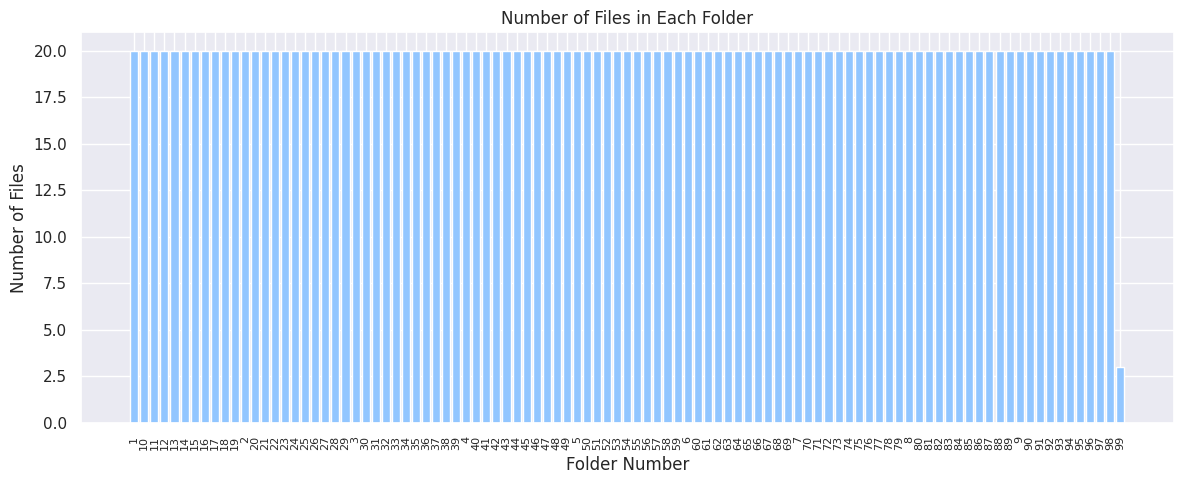

In [108]:
restaurants_path = "/kaggle/working/restaurants"

# Initialize a dictionary to store the count of files in each folder
folder_file_counts = {}
# List of all files paths
file_paths = []

# Iterate over each folder in the specified directory
for folder_name in os.listdir(restaurants_path):
    folder_path = os.path.join(restaurants_path, folder_name)
    if os.path.isdir(folder_path):
        # Add paths to the list
        file_paths.extend([os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path)])
        # Count the number of files in the current folder
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        folder_file_counts[folder_name] = file_count

# Sort the dictionary by folder name (for a cleaner plot)
folder_file_counts = dict(sorted(folder_file_counts.items()))

# Print total number of crawled files
print(sum(folder_file_counts.values()))

# Plotting
plt.figure(figsize=(12, 5))
plt.bar(folder_file_counts.keys(), folder_file_counts.values())
plt.xlabel('Folder Number')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Folder')
plt.xticks(rotation=90, fontsize=8)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

### 1.3 Parse downloaded pages



From the downloaded files I'm extracting following information about the restaurants:



1. **Restaurant Name** (to save as `restaurantName`): string;

2. **Address** (to save as `address`): string;

3. **City** (to save as `city`): string;

4. **Postal Code** (to save as `postalCode`): string;

5. **Country** (to save as `country`): string;

6. **Price Range** (to save as `priceRange`): string;

7. **Cuisine Type** (to save as `cuisineType`): string;

8. **Description** (to save as `description`): string;

9. **Facilities and Services** (to save as `facilitiesServices`): list of strings;

10. **Accepted Credit Cards** (to save as `creditCards`): list of strings;

11. **Phone Number** (to save as `phoneNumber`): string;

12. **URL to the Restaurant Page** (to save as `website`): string.

I created two specific function that are covering following approaches:

* `extract_restaurant_data()` is parsing one single .html file into a dictionary with a scructure below.

* `write_restaurant_data_to_tsv()` is function for writing parsed results into `restaurant_i.tsv` file.

In [34]:
help(parser.extract_restaurant_data)

Help on function extract_restaurant_data:

extract_restaurant_data(html_file_path)
    Extracts structured data for a restaurant from an HTML file using BeautifulSoup.
    
    This function opens and parses an HTML file containing details about a restaurant,
    then extracts specific data points (e.g., name, address, price range) by looking for 
    HTML elements and attributes associated with each field. If a 403 Forbidden error is 
    detected in the HTML, it returns None to skip processing for that file.
    
    Args:
        html_file_path (str): The path to the HTML file to parse.
    
    Returns:
        dict or None: A dictionary containing the restaurant's data if parsing is successful,
                      or None if the file is inaccessible or data extraction fails.
                      The dictionary includes the following keys:
                        - "restaurantName" (str): The name of the restaurant.
                        - "address" (str): The street address.


In [35]:
help(parser.write_restaurant_data_to_tsv)

Help on function write_restaurant_data_to_tsv:

write_restaurant_data_to_tsv(output_file_path, file_paths)
    Writes extracted restaurant data to a TSV file, handling missing values by converting them to empty strings.
    
    Args:
        output_file_path (str): The path to the output TSV file.
        file_paths (list of str): List of file paths to HTML files to process.
        
    The function writes the data in a tab-separated format with headers at the top. Each row corresponds
    to a restaurant, with empty values where data is missing to ensure consistent column alignment. The
    function appends data to the file if it already exists, adding headers only if the file is new or empty.
    
    Functionality:
        - For each HTML file in file_paths, extracts restaurant data using `extract_restaurant_data`.
        - Writes a row to the TSV file for each restaurant, with missing fields represented as empty strings.
        - Skips entries if a 403 error is detected in the 

In [177]:
from tqdm import tqdm

# Wrap file_paths with tqdm for progress tracking
file_paths_with_progress = (file_path for file_path in tqdm(file_paths, desc="Processing files", unit="file"))
parser.write_restaurant_data_to_tsv(output_file_path = "restaurant_i.tsv", file_paths = file_paths_with_progress)

Processing files:  41%|████      | 809/1963 [02:25<03:06,  6.17file/s]

All values are undefined, skipping this row: /kaggle/working/restaurants/87/radici-restaurant.html


Processing files: 100%|██████████| 1963/1963 [05:55<00:00,  5.52file/s]


`radici-restaurant` was removed from the site, so the tsv should contain 1962 lines.

In [175]:
# Path to the file
tsv_file_path = "/kaggle/working/restaurant_i.tsv"

**Loading the data into the data frame**

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('seaborn-v0_8-pastel')

In [183]:
# Load the tsv file into a DataFrame
restaurants = pd.read_csv(tsv_file_path, sep='\t')

# Add a new index column
restaurants.index = range(1, len(restaurants) + 1)
restaurants.index.name = 'index'

In [179]:
restaurants.head(3)

,restaurantName,address,city,postalCode,country,priceRange,cuisineType,description,facilitiesServices,creditCards,phoneNumber,website
index,,,,,,,,,,,,
1,Io e Luna,località Montebello 1,Guarene,14012.0,Italy,€€,"Regional Cuisine, Contemporary",This classic-style restaurant serving updated ...,"['Air conditioning', 'Car park', 'Garden or pa...","['dinersclub', 'mastercard', 'visa']",+39 0173 611724,http://www.ioeluna.com
2,Il Piraña,via G. Valentini 110,Prato,59100.0,Italy,€€€,Seafood,A classic fish restaurant that opts for simply...,['Air conditioning'],"['amex', 'unionpay', 'dinersclub', 'discover',...",+39 0574 25746,https://www.ristorantepirana.it
3,Frosch Restaurant,via Santi Pietro e Paolo 1,Varena,38030.0,Italy,€€€,"Contemporary, Italian Contemporary",Situated in the centre of the small village of...,none,"['maestrocard', 'mastercard', 'visa']",+39 377 394 1672,https://www.frosch-restaurant.com/


**Basic information about the dataset**

In [184]:
print("Number of rows:", restaurants.shape[0])
print("Number of columns:", restaurants.shape[1])
print("Columns:")
print(restaurants.columns)
print("Data Types:")
print(restaurants.dtypes)

Number of rows: 1962
Number of columns: 12
Columns:
Index(['restaurantName', 'address', 'city', 'postalCode', 'country',
       'priceRange', 'cuisineType', 'description', 'facilitiesServices',
       'creditCards', 'phoneNumber', 'website'],
      dtype='object')
Data Types:
restaurantName         object
address                object
city                   object
postalCode            float64
country                object
priceRange             object
cuisineType            object
description            object
facilitiesServices     object
creditCards            object
phoneNumber            object
website                object
dtype: object


**Missing Values**

In [186]:
# Print shape of dataframe before dropping missing values
print(f"The dataframe shape before dropping NAs: {restaurants.shape}")
restaurants.isna().sum()

The dataframe shape before dropping NAs: (1962, 12)


restaurantName          0
address                 7
city                    7
postalCode              7
country                 7
priceRange              0
cuisineType             0
description             0
facilitiesServices      0
creditCards             0
phoneNumber             0
website               119
dtype: int64

In [188]:
# Drop rows with missing values in any column except 'website'
restaurants = restaurants.dropna(subset=[col for col in restaurants.columns if col != 'website'])
# Print the shape of the dataframe after dropping the rows
print(f"The dataframe shape after dropping NAs (excluding 'website'): {restaurants.shape}")
restaurants.isna().sum()

The dataframe shape after dropping NAs (excluding 'website'): (1955, 12)


restaurantName          0
address                 0
city                    0
postalCode              0
country                 0
priceRange              0
cuisineType             0
description             0
facilitiesServices      0
creditCards             0
phoneNumber             0
website               118
dtype: int64

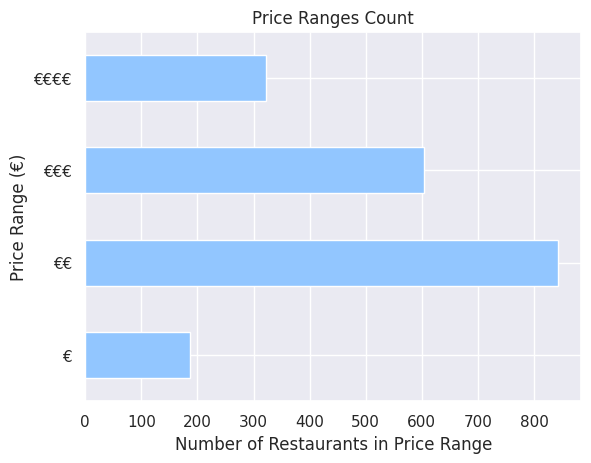

In [189]:
restaurants.groupby('priceRange').size().plot(kind='barh')
plt.title('Price Ranges Count')
plt.xlabel('Number of Restaurants in Price Range')
plt.ylabel('Price Range (€)')
plt.show()

## 2. Search Engine



This search engine allows you to retrieve restaurants based on a user query. We’ll build two types of search engines:



1. **Conjunctive Search Engine**: Returns restaurants where all query terms appear in the description.

2. **Ranked Search Engine**: Returns the top-k restaurants sorted by similarity to the query, using TF-IDF and Cosine Similarity.

### 2.0 Preprocessing

#### 2.0.0 Preprocessing the Text

**Preprocess**

`engine.py` was created to handle various preprocessing tasks that improve the accuracy of a search engine. The main goals are to:

* Handle misspellings in the text.
* Extend the description with synonyms for broader searchability.
* Remove low-frequency words to reduce noise in search queries.

These goals are achieved through the following methods:

1. `get_synonyms`: generates a set of synonyms for a given word using WordNet, which can be used to expand the search space by including similar terms.

2. `preprocess`: preprocesses the text by removing stopwords, correcting spelling, expanding with synonyms, filtering low-frequency words, and applying stemming to normalize words.

This is the main method for preprocessing text descriptions. It goes through several steps:

* <u>Correct Misspellings</u>: Uses TextBlob to automatically correct spelling errors, enhancing search accuracy.
* <u>Tokenize and Lowercase</u>: Converts text to lowercase and tokenizes it into individual words.
* <u>Filter Stopwords and Low-Frequency Words</u>: Removes common stopwords and words that appear infrequently (below a specified frequency threshold), which helps reduce noise in the data.
* <u>Expand Synonyms</u>: For each word, retrieves synonyms using get_synonyms to expand the description’s vocabulary.
* <u>Stem Words</u>: Applies stemming to normalize words to their root form, making the search engine more robust to variations in word forms.

The preprocess method produces a cleaned, expanded version of the original text, making it more suitable for effective searching.

3. `get_normalized_tokens`: tokenizes and normalizes a text string by converting it to lowercase and removing punctuation.

In [190]:
help(engine.preprocess)

Help on function preprocess:

preprocess(text)
    Preprocesses the given text: removes stopwords, corrects spelling,
    expands synonyms and applies stemming.
    Args:
        text (str): The input text.
    Returns:
        str: The preprocessed text.



In [191]:
# For tracking the result
tqdm.pandas()

# Apply processing with progress bar
restaurants['preprocessed_description'] = restaurants['description'].progress_apply(lambda x: engine.preprocess(x))

  7%|▋         | 129/1955 [05:02<1:11:16,  2.34s/it]


KeyboardInterrupt: 

Since the preprocessing is quite long procedure I decided to backup results into new file `processed_restaurants.tsv`.

In [68]:
# Save the processed DataFrame to a TSV file 
tsv_processed_file_path = "processed_restaurants.tsv"
restaurants.to_csv(tsv_processed_file_path, sep='\t', index=True, encoding='utf-8')

In [64]:
restaurants.head(3)

,index,restaurantName,address,city,postalCode,country,priceRange,cuisineType,description,facilitiesServices,creditCards,phoneNumber,website,preprocessed_description
0,1,O Me O Il Mare,Via Roma 45/47,Gragnano,80054,Italy,€€€€,"Italian Contemporary, Modern Cuisine",After many years’ experience in Michelin-starr...,"['Air conditioning', 'Interesting wine list', ...","['amex', 'dinersclub', 'mastercard', 'visa']",+39 081 620 0550,http://omeoilmare.com,mani mani year year day old ag twelvemonth yea...
1,2,Ape Vino e Cucina,Piazza Risorgimento 3,Alba,12051,Italy,€€,"Piedmontese, Contemporary",This attractive restaurant in the heart of Alb...,"['Air conditioning', 'Terrace', 'Wheelchair ac...","['amex', 'dinersclub', 'maestrocard', 'masterc...",+39 0173 363453,https://www.apewinebar.it/alba/,attract attract restaur restaur eating hous ea...
2,3,Da Bob Cook Fish,largo Parsano vecchio 16,Sorrento,80067,Italy,€€,Seafood,Working in partnership with the nearby fishmon...,"['Air conditioning', 'Terrace']","['amex', 'dinersclub', 'mastercard', 'visa']",+39 081 1778 3873,https://www.dabobcookfish.com/,work work mold oper forg function function sou...


### 2.1 Conjunctive Query

This first version of the search engine narrows the search to the description field of each restaurant. Only restaurants whose descriptions contain all the query words will be returned.

#### 2.1.1 Create Your Index!

Vocabulary File: Create a file called `vocabulary.csv` that maps each word to a unique integer (`term_id`).

Inverted Index: Build a dictionary mapping each `term_id` to a list of document IDs where that term appears.
```json
{
  "term_id_1": [document_1, document_2, document_4],
  "term_id_2": [document_1, document_3, document_5],
  ...
}
```

In [68]:
import json

# Invoke indicies creation
vocabulary, inverted_index = engine.create_index(restaurants)

# Save vocabulary into cvs file
vocab_df = pd.DataFrame(list(vocabulary.items()), columns=['term', 'term_id'])
vocab_df.to_csv('vocabulary.csv', index=False)
print("Vocabulary saved to 'vocabulary.csv'")

# Save inverted_index into json file
with open('inverted_index.json', 'w') as f:
    json.dump(inverted_index, f)
print("Inverted index saved to 'inverted_index.json'")

Vocabulary saved to 'vocabulary.csv'
Inverted index saved to 'inverted_index.json'


In [69]:
vocab_df

,term,term_id
0,chang,0
1,peach,1
2,exalt,2
3,captiv,3
4,worldclass,4
...,...,...
9696,menachem,9696
9697,castelfranco,9697
9698,classici,9698
9699,sip,9699


#### 2.1.2 Execute the Query

Also in the `engine` module I created a method `execute` that has the following functionality:

In [112]:
help(engine.execute)

Help on function execute:

execute(query, vocabulary, inverted_index, restaurants)
    Executes a conjunctive query on the restaurant descriptions, returning only those restaurants
    whose descriptions contain all query terms.
    
    Args:
        query (str): The user input query string containing one or more search terms.
        vocabulary (dict): A dictionary mapping each unique word in the dataset to a unique term ID (int).
        inverted_index (defaultdict): A dictionary where each key is a term ID, and the corresponding value
                                      is a list of document IDs where that term appears.
        restaurants (pd.DataFrame): A DataFrame containing restaurant data, including columns like 'restaurantName',
                                    'address', 'description', and 'website'.
    
    Returns:
        pd.DataFrame: A DataFrame containing information about restaurants that match the query.
                      The columns include 'restaurantName

In [70]:
engine.execute("modern seasonal cuisine", vocabulary, inverted_index, restaurants)

KeyError: '[1949] not in index'

### 2.2 Ranked Search Engine with TF-IDF and Cosine Similarity
For the second search engine, given a query, retrieve the top-k restaurants ranked by relevance to the query.

#### 2.2.1 Inverted Index with TF-IDF Scores
* <u>TF-IDF Scores</u>: Calculate TF-IDF scores for each term in each restaurant’s description.
* <u>Updated Inverted Index</u>: Build a new inverted index where each entry is a term, and the value is a list of tuples containing document IDs and TF-IDF scores.
Format:
```json
{
  "term_id_1": [(document1, tfIdf_{term,document1}), (document2, tfIdf_{term,document2}), ...],
  "term_id_2": [(document1, tfIdf_{term,document1}), (document3, tfIdf_{term,document3}), ...],
  ...
}
```

#### 2.2.2 Execute the Ranked Query

For the ranked search engine:
1. Process the query terms.
2. Use **Cosine Similarity** to rank matching restaurants based on the TF-IDF vectors of the query and each document.
3. Return the *top-k* results or all matching restaurants if fewer than *k* have non-zero similarity.

Each result should include:
- `restaurantName`
- `address`
- `description`
- `website`
- Similarity score (between 0 and 1)